Add to enable matplotlib backend for magic usage. With this backend, the output of plotting commands is displayed inline within frontend and the resulting plots will then also be stored in the notebook document.

In [22]:
%matplotlib inline

# Ridge regression

In [23]:
import matplotlib.pyplot as plt
from numpy import *

<!-- set_background('') -->
## Generate data

We generate a model with a lot of noise and not too many examples. This imply that the system is underdetermined and in such a setup, the least squares estimate is expected to overfit to the noise. We then, expect ridge regression to perform better for some regularization parameter $\lambda$.

In [24]:
d = 20 # number of features
n = 40 # number of examples
sigma = 0.8 # Variance of gaussian noise with 0 mean

theta = random.randn(d) # Parameter vector
X = random.rand(n,d) # Data of n examples with each row having d features in column space

y = dot(X,theta) + sigma*random.randn(n) # Linear model fitting y = <X, theta> + z

Define the Ridge Regression Estimate (RRE) and the Normalized Mean Squared Error (NMSE) 

In [25]:
def RRE(X,y,lam):
    inv = linalg.inv( dot(X.T,X) + lam*diag(ones(d)) )
    return dot( inv ,  dot(X.T,y) )
def NMSE(x,y):
    return linalg.norm(x)**2 / linalg.norm(y)**2

Define span for lambdas and visualize how lambda varies with the NMSE i.e. visualize bias-variance relationship. We expect that as lambda tends to zero, theta converges to least square solution and thus the NMSE sgould be the minimum. However, as lambda tends to +infinity, theta converges to 0 i.e. in this case, NMSE will be tend to maximum value of 1. 

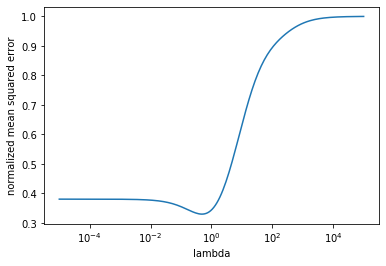

In [26]:
lambdaspace = logspace(-5, 5, num=200)
path = [NMSE(theta - RRE(X,y,lam), theta) for lam in lambdaspace]
plt.semilogx(lambdaspace,path)
plt.xlabel('lambda')
plt.ylabel('normalized mean squared error')
plt.show()

The coefficients are shrunk to zero by RRE:

In [27]:
coeffs = array([RRE(X,y,lam) for lam in lambdaspace])

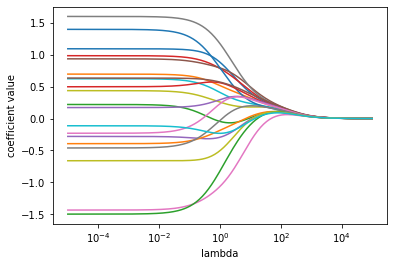

In [28]:
for c in coeffs.T:
    plt.semilogx(lambdaspace,c)
plt.xlabel('lambda')
plt.ylabel('coefficient value')
plt.show()